<a href="https://colab.research.google.com/github/AgusFeld/Evaluacion/blob/main/NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de Librerias ###

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import PIL.Image
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

### Importación del Data-Frame ###

In [ ]:
csv = "NetflixHistory (1).csv"

#### Asignación del Data-Frame a una variable ####

In [ ]:
df = pd.read_csv(csv)

### Filtrado de Dispositivos para solo obtener los deseados ###

In [ ]:
def filtrar_dispositivos(dispositivos):
  return dispositivos not in ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']
# Devuelve un bool dependiendo si en la tabla o columna seleccionada se encuentra alguno de los nombres,
# si se encuentra devuelve un False y si no encuentra devuelve un True en cada una de las filas.

In [ ]:
dataframe = df[df["Device Type"].apply(filtrar_dispositivos)]
# Se le aplica a df la funcion filtrar_dispositivos la cual genera una lista de bools, posteriormente utilizando tal lista de bools asigna aquellas filas que estuviesen con True a df. 
# La nueva lista solamente con las filas que tuviesen True despues de aplicar la función se guardarían en la variable dataframe.   
dataframe.head(5)
# se muestran las primeras 5 filas para comprobar el funcionamiento del código.

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)


In [ ]:
e = df[df["Device Type"].apply(filtrar_dispositivos)]

#Conversion a Segundos

In [ ]:
def ConversionSegundos(string):
  if not isinstance(string, str):
    return string
  
  hours, minutes, seconds = string.split(":")
  return int(seconds) + (int(minutes) + int(hours) * 60) * 60

# Reemplazamos duration con la duracion en segundos
e['Duration'] = e['Duration'].apply(ConversionSegundos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
e['Start Time'] = e['Start Time'].apply(pd.Timestamp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Ejercicio A

## Consigna: Contabilizar el dispositivo con el que más títulos se reprodujeron.

In [ ]:
dataframe["Device Type"].value_counts()
# Mediante el uso del método de pandas "value_counts()" se crea una lista con los valores de cuantas veces se repite un valor en una columna.

Apple Apple TV 4 Apple TV                         3519
Apple TV 3 (revised)                              1216
Netflix Chrome MAC (Cadmium) HTML 5                449
Safari MAC (Cadmium)                               270
Apple iPhone 4S                                    259
Apple iPod Touch 5G                                220
Wii Bowser                                          99
LG 2016 LG M16 STD RGBW UHD TV Smart TV             91
Apple iPad 3                                        73
Apple iPhone 11 Pro                                 39
LG 2016 MStar M2 Low DTV Smart TV                   39
Apple iPad 3rd Gen (Wi-Fi Only) iPad                12
LG 2017 LG M16p Standard UHD TV Smart TV             3
Apple iPhone 13 Mini                                 1
Android DefaultWidevineL3Tablet Android Tablet       1
Name: Device Type, dtype: int64

In [ ]:
dataframe["Device Type"].value_counts().idxmax()
# Mediante el uso del método de pandas "idxmax()", muestro el objeto que más se repite en la columna "Device Type" del dataframe.

'Apple Apple TV 4 Apple TV'

# Ejercicio B

## Consigna: Encontrar la película con más ocurrencias y la película con mayor duración total.

### Averiguamos mediante dos comprobaciones cuales son las películas

In [ ]:
pelicula_check1 = dataframe[dataframe.Title.str.contains('Capítulo') == False]
# Asigna a una variable nueva, (pelicula_check1), todos los valores del dataframe en las cuales el Título no contenga la palabra Capítulo 
# lo cual nos ayuda a determinar si se trata de una serie o película

pelicula_check2 = pelicula_check1[pd.isna(pelicula_check1['Supplemental Video Type'])]
# Asigna a una variable nueva, (pelicula_check2), todos los valores de la variable pelicula_check1 en las cuales no tenga ningún valor asignado en la columna Supplementary Video Type
# ya que las películas no suelen poseer ningún valor en tal columna
 
peliculas = pelicula_check2
# Asigno la segunda comprobación de si es una película a una nueva variable para organizar mejor

### Averiguamos la película vista con mayor ocurrencia 

In [ ]:
peliculas["Title"].value_counts().idxmax()
# Usando el mismo método que en el ejercicio A, muestro el objeto que más se repite en la columna "Title" lo cual devuelve la película más vista.

'Star Wars: El Imperio contraataca'

### Averiguamos la película vista con mayor duración

#### Creamos una función que cambie el valor de la duración a segundos. La función separa los valores de "tiempo", ("Duration" de la tabla) por los ":". Por como los separa pude determinar que los primeros valores son horas, después minutos y por último segundos. Para convertir todo a segundos la función debe multiplicar el valor de la/s hora/s por 3600 y el valor de lo/s minuto/s por 60. Después de hacerlo, suma todos los valores y devuelve el resultado.

In [ ]:
def duracion(tiempo):
  tiempo_fin = []
  tiempo_int = tiempo.split(":", 2)

  for i in range(len(tiempo_int)):
    tiempo_fin.append(int(tiempo_int[i]))
  tiempo_seg = tiempo_fin[0] * 3600 + tiempo_fin[1] * 60 + tiempo_fin[2]

  return tiempo_seg

#### Le aplicamos la función a la columna duración

In [ ]:
peliculas["Duration"] = peliculas["Duration"].apply(duracion)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Averiguamos cual es la duración máxima de la película más larga vista

In [ ]:
peliculas["Duration"].max()
# Utilizando el método "max()" determinamos cual es la duración máxima de una película vista

8411

#### Utilizamos el valor de la duración máxima para determinar cual es la película con tal duración

In [ ]:
peliculas[peliculas["Duration"] == 8411]
# Averiguo cual es la película que posee la duración de 8411 segundos al igualar los valores de la columna "Duration" a 8411 lo cual devuelve todas las filas que posean esa característica

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
8127,8127,Chona,2017-07-24 02:25:00,8411,NaN,El club de la pelea,NaN,Safari MAC (Cadmium),02:16:26,02:16:26,AR (Argentina)


### Averiguamos la película con mayor duración total

In [ ]:
pelis = peliculas["Title"].unique()
# Utilizamos el método "unique()" para determinar todos los títulos los cuales sean películas.

duraciones = [sum(peliculas[peliculas["Title"] == peli]["Duration"]) for peli in pelis]
# Mediante un for que asigna a una variable "peli" los nombres de los títulos de películas, se toma tal valor y se agarra toda duración que haya tenido la peli para posteriormente sumarlo.
# Una vez sumado los valores de ser necesario se guardan en la variable "duraciones"

duracion_pelis = pd.Series(duraciones)
# Utilizando el método de pandas "Series", se crea una serie con todos los valores de la variable duración.

nombre_duracion = pd.DataFrame({"Title": pelis, "Duration(sec)": duracion_pelis})
# Se crea un dataframe el cual posee solamente los títulos de las películas (variable "pelis"), y la duración total de las mismas ("duracion_pelis"). 

duracion_max = nombre_duracion['Duration(sec)'].max()
# Se asigna a la variable "duracion_max", mediante el método "max()", el valor más grande de la columna "Duration (seg)" del dataframe "nombre_duracion"

peli_mayor_duracion = nombre_duracion[['Title', 'Duration(sec)']][nombre_duracion['Duration(sec)'] == duracion_max]
# Se asigna a la variable "peli_mayor_duracion", la fila del dataframe "nombre_duracion" en la cual se cumpla que la duración sea igual que la variable "duracion_max".

peli_mayor_duracion
# Se muestra la película con mayor duración total vista.

,Title,Duration(sec)
38,Star Wars: El Imperio contraataca,29433


# Ejercicio C

### Averiguamos cuales son las series

In [ ]:
serie_check1 = dataframe[dataframe.Title.str.contains('Capítulo') == True]
# Asigna a una variable nueva, (serie_check1), todos los valores del dataframe en las cuales el Título contenga la palabra Capítulo 
# lo cual nos ayuda a determinar si se trata de una serie o película

series = serie_check1

series

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


In [ ]:
titulosSeries1 = series['Title'].apply(lambda x: x.split(":")[0]).value_counts().to_dict()
titulosSeries2 = series['Title'].apply(lambda x: x.split(":")[0]).value_counts().to_dict()

In [ ]:
top = 5

# i

In [ ]:
for titulo in titulosSeries2.keys():
  titulosSeries2[titulo] = sum(series[series['Title'].str.contains(titulo)]['Duration'])

datos1 = dict(sorted(titulosSeries2.items(), key=lambda item: item[1], reverse=True)[:top])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


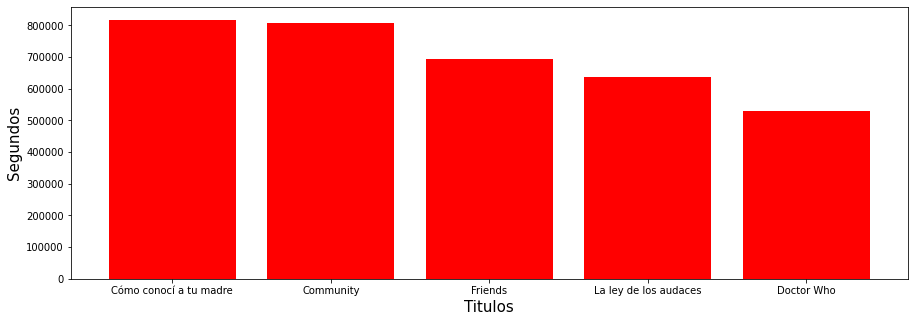

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(datos1.keys(), datos1.values(), color = 'red')
plt.xlabel("Titulos", fontsize=15)
plt.ylabel("Segundos", fontsize=15)
plt.show()

# ii

In [ ]:
datos2 = dict(sorted(titulosSeries1.items(), key=lambda item: item[1], reverse=True)[:top])

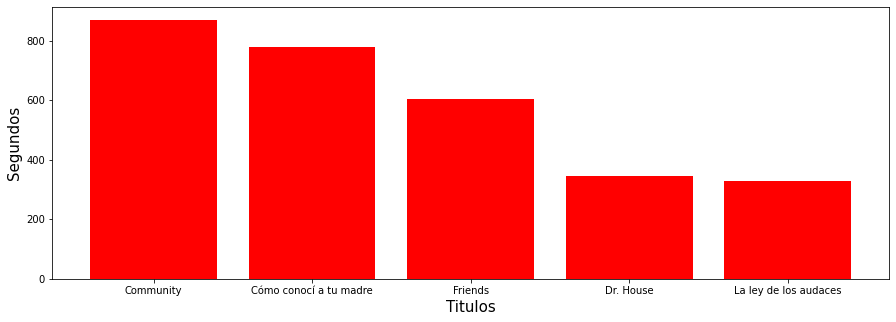

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(datos2.keys(), datos2.values(), color = 'red')
plt.xlabel("Titulos", fontsize=15)
plt.ylabel("Segundos", fontsize=15)
plt.show()

# Ejercicio D

In [ ]:
vistas_diarias = [[y for y in range(24)] for x in range(7)]
for d in range(0,7):
  for h in range(0,24):
    vistas_diarias[d][h] = sum(e[(e['Start Time'].dt.dayofweek == d) & (e['Start Time'].dt.hour == h)]['Title'].value_counts().to_list())

# Mostramos los resultados en una especia de mapa de Calor

Text(159.0, 0.5, 'Dias')

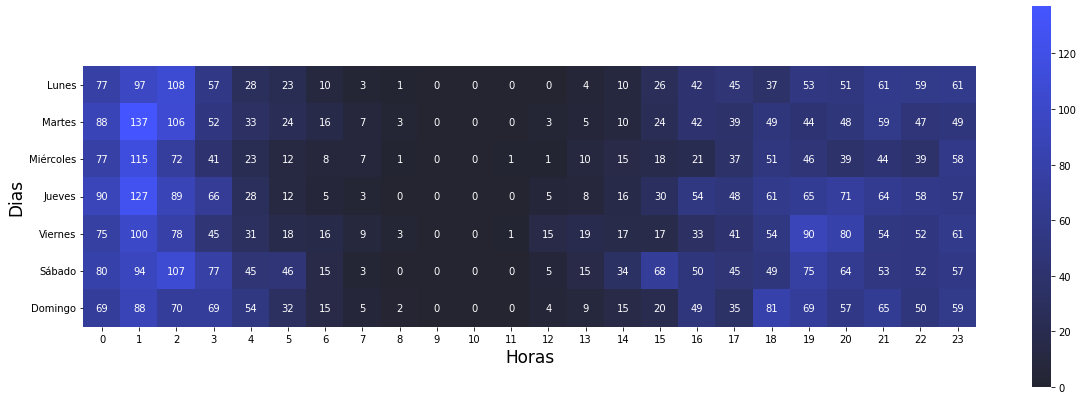

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(vistas_diarias, annot=True, fmt="d", square=True, yticklabels=["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], cmap=sns.color_palette("dark:#45f3", as_cmap=True))
plt.xlabel("Horas", fontsize=17)
plt.ylabel("Dias", fontsize=17)

#E

# Procedemos a acceder unicamente a los años en el registro de tiempos de inicio

In [ ]:
a = dict(e['Start Time'].dt.year.value_counts())

# Ordenamos los items del diccionario años en base a la key, es decir el año, y despues los convertimos a un diccionario
a = dict(sorted(a.items()))

# Mostramos los resultados via una tabla de barras

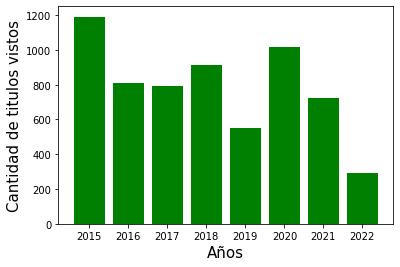

In [ ]:
plt.bar(a.keys(), a.values(), color = 'green')
plt.xlabel("Años", fontsize=15)
plt.ylabel("Cantidad de titulos vistos", fontsize=15)
plt.show()

# F

In [ ]:
titulosTotales = e['Title'].value_counts().to_dict()

segundosTotales = 0

for titulo in titulosTotales.keys():
  segundosTotales += sum(e[e['Title'] == titulo]['Duration'])

days = segundosTotales/86400
hours= (days - int(days)) * 24
minutes = (hours - int(hours)) * 60
seconds = (minutes - int(minutes)) * 60

In [ ]:
print("Tiempo total: " + str(int(days)) + "d " + str(int(hours)) + "h " + str(int(minutes)) + "m " + str(int(seconds)) + "s")

Tiempo total: 99d 18h 44m 33s
